## Sentiment Classification 😺


In this baseline we will be training an sklearn model to do a multi-class classificattion of sentiment from face embeddings. 

## Downloading Dataset

Installing puzzle datasets via `aicrowd-cli`

In [2]:
# !pip install aicrowd-cli
# Make sure to re-run below code whenever you restart colab notebook
%load_ext aicrowd.magic
%aicrowd login

The aicrowd.magic extension is already loaded. To reload it, use:
  %reload_ext aicrowd.magic
Please login here: https://api.aicrowd.com/auth/HP6MAc5Vd1n7g-gN1K5OuwhgEEpiGIR_KSJK9XFHmQs
API Key valid
Gitlab access token valid
Saved details successfully!


In [3]:
# Creating a new data directory and downloading the dataset 
!rm -rf data
!mkdir data
%aicrowd ds dl -c sentiment-classification -o data

val.csv:   0%|          | 0.00/20.6M [00:00<?, ?B/s]


val.csv:  15%|█▌        | 3.15M/20.6M [00:01<00:09, 1.93MB/s]
val.csv:  25%|██▌       | 5.24M/20.6M [00:02<00:06, 2.28MB/s]



val.csv:  31%|███       | 6.29M/20.6M [00:02<00:05, 2.42MB/s]


val.csv:  36%|███▌      | 7.34M/20.6M [00:03<00:04, 2.73MB/s]


val.csv:  46%|████▌     | 9.44M/20.6M [00:04<00:05, 1.92MB/s]


val.csv:  51%|█████     | 10.5M/20.6M [00:04<00:04, 2.24MB/s]




val.csv:  56%|█████▌    | 11.5M/20.6M [00:06<00:05, 1.54MB/s]





val.csv:  66%|██████▌   | 13.6M/20.6M [00:07<00:04, 1.74MB/s]


val.csv:  76%|███████▋  | 15.7M/20.6M [00:07<00:02, 2.03MB/s]




val.csv:  87%|████████▋ | 17.8M/20.6M [00:08<00:01, 2.41MB/s]




val.csv:  92%|█████████▏| 18.9M/20.6M [00:09<00:00, 2.13MB/s]




val.csv: 100%|██████████| 20.6M/20.6M [00:09<00:00, 2.09MB/s]






















test.csv: 100%|██████████| 30.9M/30.9M [00:13<00:00, 2.34MB/s]






sample_submission.csv: 100%|██████████| 30.9M/30.9M [00:13<00:00, 2.35MB/s]




## Importing Libraries

In [58]:
import pandas as pd
import os
import numpy as np
from ast import literal_eval
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn import decomposition
from sklearn.metrics import f1_score, accuracy_score

random.seed(42)

### Helper function

In [62]:
n_row, n_col = 2, 3

def plot_gallery(title, images, image_shape, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vec = np.asarray(vec)
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

def centering(data: np.array):
    n_samples, n_features = data.shape
    data = data - data.mean(axis=0)
    data -= data.mean(axis=1).reshape(n_samples, -1)
    return data

## Open Dataset and do simple preprocessing

In [18]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")
sub_df = pd.read_csv("data/sample_submission.csv")

train_df.head()

,embeddings,label
0,"[0.3206779360771179, 0.988215982913971, 1.0441...",positive
1,"[0.05074610561132431, 1.0742985010147095, 0.60...",negative
2,"[0.41962647438049316, 0.4505457878112793, 1.39...",negative
3,"[0.4361684024333954, 0.19191382825374603, 0.83...",positive
4,"[0.6382085084915161, 0.8352395296096802, 0.393...",neutral


<AxesSubplot:>

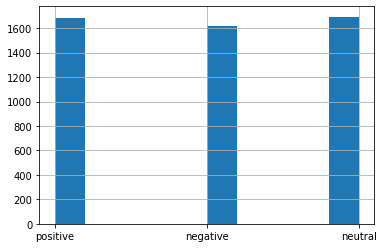

In [19]:
train_df['label'].hist()

In [69]:
# Getting the feature and labels from each set. 
X_train = np.array([literal_eval(embedding)  for embedding in train_df['embeddings'].values])
y_train = train_df['label'].values

X_val = np.array([literal_eval(embedding)  for embedding in val_df['embeddings'].values])
y_val = val_df['label'].values

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (5000, 512)
Validation shape: (2000, 512)


(2000, 512)

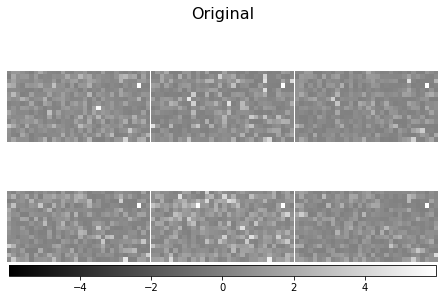

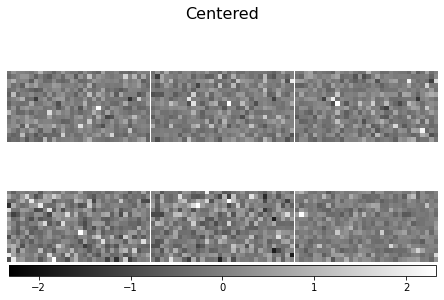

In [74]:
plot_gallery("Original", X_train[:6], image_shape=(16, 32))
plot_gallery("Centered", centering(X_train)[:6], image_shape=(16, 32))

## Training the model

Here, we will be training our model using the training set. 

In [61]:
model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=2 
).fit(X_train, y_train)

In [63]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

### Testing the Model

Here, we will be evaluator our model using validation set 

In [65]:
y_pred = model.predict(X_val)

print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted')}")
print(f"Accuracy Score : {accuracy_score(y_val, y_pred)}")

F1 Score : 0.6962455437159478
Accuracy Score : 0.698


In [66]:
y_pred = clf.predict(X_val)

print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted')}")
print(f"Accuracy Score : {accuracy_score(y_val, y_pred)}")

F1 Score : 0.7210934933670742
Accuracy Score : 0.7235


## Generating the Predictions

Generating Predictions from test data to make submission in the puzzle. 

In [57]:
submission_embeddings = [literal_eval(embedding)  for embedding in sub_df['embeddings'].values]

predictions = model.predict(fa_estimator.transform(submission_embeddings))
predictions.shape

(3001,)

In [50]:
sub_df['label'] = predictions
sub_df

,embeddings,label
0,"[0.08109518140554428, 0.3090009093284607, 1.36...",neutral
1,"[0.6809610724449158, 1.1909409761428833, 0.892...",negative
2,"[0.14851869642734528, 0.7872061133384705, 0.89...",neutral
3,"[0.44697386026382446, 0.36429283022880554, 0.7...",neutral
4,"[1.8009324073791504, 0.26081395149230957, 0.40...",negative
...,...,...
2996,"[0.9138844609260559, 0.9460961222648621, 0.571...",negative
2997,"[0.7667452096939087, 0.7896291613578796, 0.648...",negative
2998,"[0.8158280849456787, 2.404792070388794, 0.9924...",neutral
2999,"[0.4161085784435272, 0.3146701455116272, 1.139...",positive


### Saving the Predictions

In [15]:
# Saving the predictions
!rm -rf assets
!mkdir assets
sub_df.to_csv(os.path.join("assets", "submission.csv"))

## Submitting our Predictions

In [ ]:
%aicrowd notebook submit -c sentiment-classification -a assets --no-verify

Using notebook: [Baseline] Sentiment Classification for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                       
                                                       │ Successfully submitted! │                                                       
                                                       ╰─────────────────────────╯

                                                             Important links                                                             
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/172578              │
│                  │                                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions?my_submissions=true │
│                  │                                                                                                                    │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/leaderboards                    │
│                  │                                                                                                                    │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xiii                                                                      │
│                  │                                                                                                                    │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification                                 │
└──────────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘